In [3]:
# Realizar as importações
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

input_path = '../images/'
output_path = 'output/'

if not os.path.exists(output_path):
    os.makedirs(output_path)

# 1.1 - 

In [ ]:
nome = 'house'
imagem_gray = cv2.imread(input_path + nome + '.png', cv2.IMREAD_GRAYSCALE)
imagem_gray = imagem_gray.astype(np.float32)

imagens = []
gamas = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 5.0, 9.0]
for gama in gamas:
    imagem_gama = cv2.normalize(imagem_gray, None, 0, 1, cv2.NORM_MINMAX)
    imagem_gama = cv2.pow(imagem_gray, 1/gama)
    imagem_gama = cv2.normalize(imagem_gama, None, 0, 255, cv2.NORM_MINMAX)
    imagem_gama = imagem_gama.astype(np.uint8)
    imagens.append(imagem_gama)

for i in range(3):
    plt.figure(figsize=(30, 10))
    for j in range(3):
        plt.subplot(1, 3, j + 1)
        plt.imshow(imagens[3*i + j], cmap='gray', vmin=0, vmax=255)
        plt.title('Imagem Original' if 3*i + j == 3 else f'Gamma = {gamas[3*i + j]}')
        plt.axis('off')
        cv2.imwrite(output_path + "2_" + ('Imagem Original' if 3*i + j == 3 else f'Gamma {gamas[3*i + j]}').replace(" ", "_") + ".png", imagens[3*i + j], [cv2.IMWRITE_PNG_COMPRESSION, 0])
    plt.show()



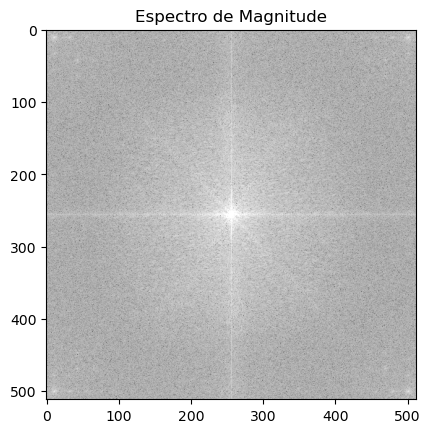

In [ ]:
nome = 'house'
imagem_gray = cv2.imread(input_path + nome + '.png', cv2.IMREAD_GRAYSCALE)
imagem_gray = imagem_gray.astype(np.float32)

transf = np.fft.fft2(imagem_gray)
transf2 = np.fft.fftshift(transf)

magnitude_spectrum = 20 * np.log(np.abs(transf2))

plt.imshow(magnitude_spectrum, cmap='gray', vmin=0, vmax=255)
plt.title('Espectro de Magnitude')
plt.show()




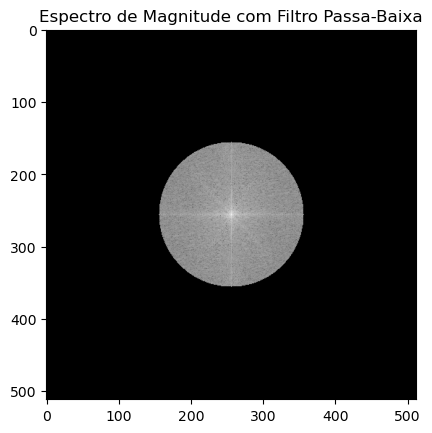

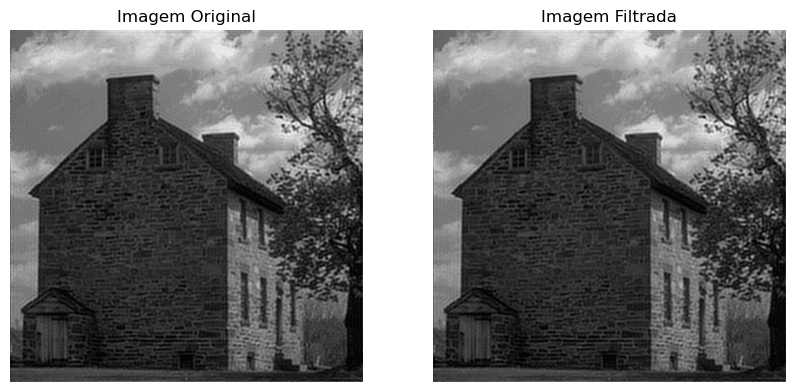

In [29]:
rows, cols = imagem_gray.shape
crow, ccol = rows // 2 , cols // 2
radius = 100

mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

fshift_filtered = transf2 * mask
plt.imshow(np.log(1 + np.abs(fshift_filtered)), cmap='gray')
plt.title('Espectro de Magnitude com Filtro Passa-Baixa')
plt.show()

# Desfaz o shift
f_ishift = np.fft.ifftshift(fshift_filtered)

# Aplica a transformada inversa
img_back = np.fft.ifft2(fshift_filtered)
img_back2 = np.fft.ifft2(f_ishift)

# Converte para imagem real
img_back = np.abs(img_back)
img_back2 = np.abs(img_back2)

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img_back2, cmap='gray')
plt.title('Imagem Original'), plt.axis('off')
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Imagem Filtrada'), plt.axis('off')
plt.show()